Nama: Mohammad Daffa Gashandy

NIM: 20/455449/PA/19664

Kelas: KOM

Notebook seputar implementasi "Image Enhancement", untuk meningkatkan kualitas pixel sehingga gambar output semakin jelas dan dapat diambil informasi lebih banyak
Berikut beberapa contoh penggunaan Image Enhancement, berdasarkan jenis gambar dan metodenya : 
1. Low Contrast Image, menggunakan Image Contrast Stretching
2. Dark Image, menggunakan Image Brighten
3. Bright Image, menggunakan Image Darken
4. Blurred Image, menggunakan Image Sharpening

# Code

Import Library

In [ ]:
import matplotlib.pyplot as plt # Graph & Other Visualizations
import cv2 as cv # Import Image & Color Manipulations

# Import from Drive
from google.colab import drive
drive.mount('/content/drive')

# Function to Show Image
def imshowGreal(img):
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.axis('off')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) Low Contrast Image Enhancement using Contrast Stretching

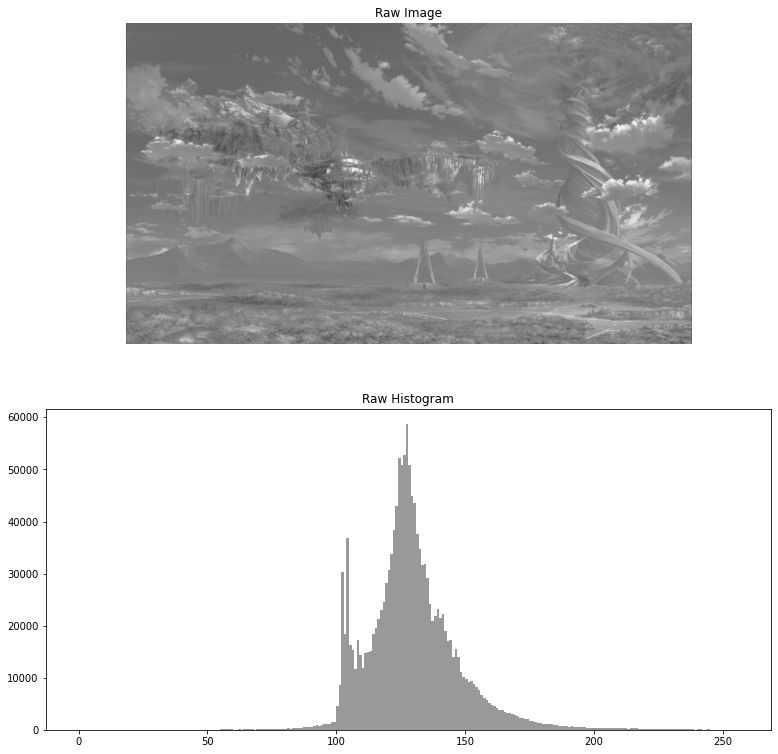

In [ ]:
# Upload Image from Drive
img_lowcontrast = cv.imread(('/content/drive/MyDrive/Pict/scenery_lowContrast.png'), cv.IMREAD_GRAYSCALE)

# Show Raw Image (Low Contrast)
plt.figure(figsize=(13,13))
plt.subplot(211)
plt.title('Raw Image')

# Show Histogram
imshowGreal(img_lowcontrast)
plt.subplot(212)
plt.title('Raw Histogram')

# Show Raw Gray-Scale Level Transform
plt.hist(img_lowcontrast.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

Stretching Pixel Algorithm for Enhancement

In [ ]:
# Value of Pixel Initiated
min = img_lowcontrast.min()
max = img_lowcontrast.max()
rows = img_lowcontrast.shape[0]
cols = img_lowcontrast.shape[1]

# Normal Contrast Stretching
def stretch(val,min,max,vmin,vmax):
    return int((val-min)*((vmax-vmin)/(max-min))+vmin)

# Piecewise Linear Contrast Stretching
import numpy as np
def piecewise_Stretch(arr,slice0,slice1):
    cut0 = int(np.percentile(arr, slice0))
    cut1 = int(np.percentile(arr, slice1))

    # Decide which pixel value to be Highlighted, Darkened, or Preserved
    for i in range (rows):
        for j in range (cols):
            if (arr[i][j] < cut0):
                arr[i][j] = stretch(arr[i][j],min,cut0,0,(255*slice0/100))
            elif (arr[i][j] > cut1):
                arr[i][j] = stretch(arr[i][j],cut1,max,(255*slice1/100),255)
            else:
                arr[i][j] = stretch(arr[i][j],cut0,cut1,(255*slice0/100),(255*slice1/100))

# Show Stretching Image
imgs_n = img_lowcontrast.copy()
for i in range (rows):
    for j in range (cols):
        imgs_n[i][j] = stretch(imgs_n[i][j], min, max, 0, 255)

# Comparison Between Stretching
imgs_pl_10100 = img_lowcontrast.copy()
piecewise_Stretch(imgs_pl_10100,10,100)

imgs_pl_2090 = img_lowcontrast.copy()
piecewise_Stretch(imgs_pl_2090,20,90)

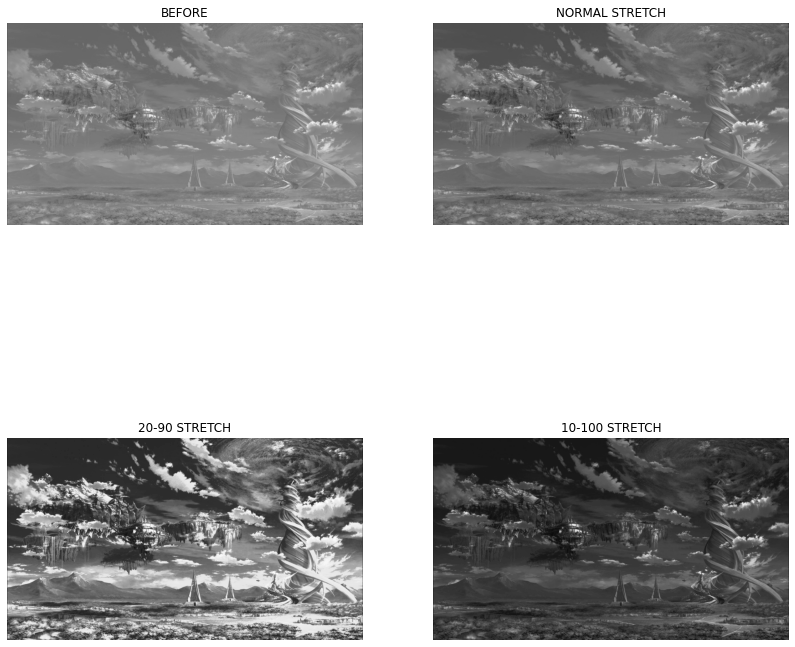

In [ ]:
# Show Output of Stretched Image
plt.figure(figsize=(14,14))

plt.subplot(221)
plt.title('BEFORE')
imshowGreal(img_lowcontrast)

plt.subplot(222)
plt.title('NORMAL STRETCH')
imshowGreal(imgs_n)

plt.subplot(223)
plt.title('20-90 STRETCH')
imshowGreal(imgs_pl_2090)

plt.subplot(224)
plt.title('10-100 STRETCH')
imshowGreal(imgs_pl_10100)

plt.show()

Dengan mengimplementasikan rumus : 
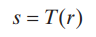 dan 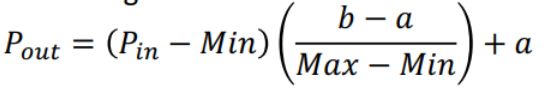

maka hasil dari penerapan transformasi ke setiap piksel di f untuk menghasilkan piksel yang sesuai di g akan menghasilkan gambar dengan kontras yang lebih tinggi daripada aslinya, dengan menggelapkan tingkat intensitas di bawah k dan mencerahkan tingkat di atas k.

Sebelum di-input, gambar telah di edit secara manual dengan aplikasi eksternal dengan mengurangi kontras dari 0 ke -220
Dapat dilihat bahwa setelah Low-Contrast Image di-enhance dengan normal stretching, gambar grayscale menjadi lebih kontas. Setelah dilakukan uji coba ternyata hasil Stretching terbaik ada pada Stretching ke 20-90, karena 10-100 menjadi lebih gelap

2) Dark Image Enhancement using Image Brighten

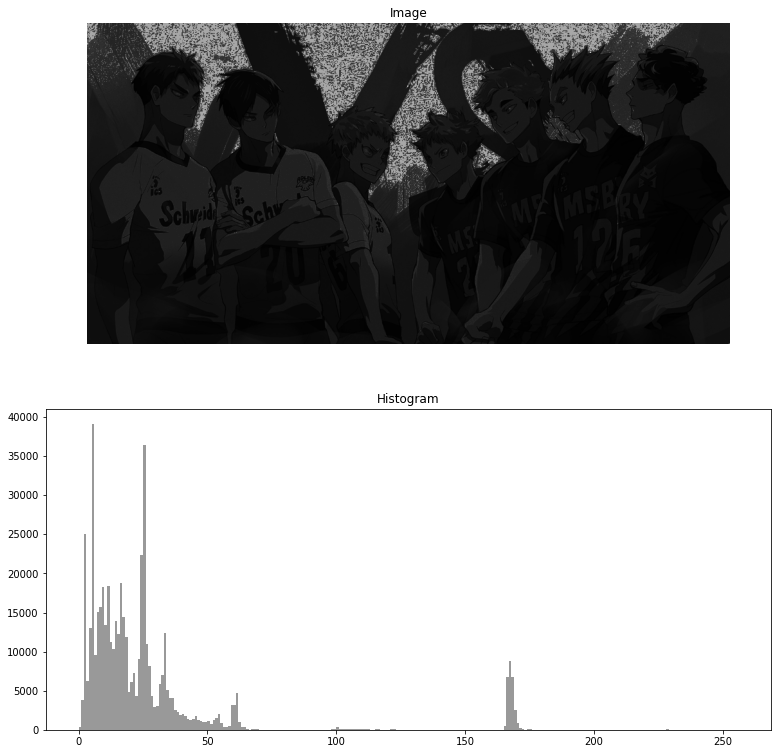

In [ ]:
# Import from Drive
image_darken = cv.imread(('/content/drive/MyDrive/Pict/adlerSweiden_darkImage.png'), cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(13,13))

plt.subplot(211)
plt.title('Image')
imshowGreal(image_darken)

plt.subplot(212)
plt.title('Histogram')

plt.hist(image_darken.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)

# Upload Raw Gray-Scaled Image
plt.show()

Brighten Pixel Algorithm for Enhancement

In [ ]:
# Value of Pixel Initiated
rows = image_darken.shape[0]
cols = image_darken.shape[1]

# Initialize table
newval=([])
for i in range(256):
    newval.append([])
    newval[-1].append(i)
    newval[-1].append(0)

# Get freq
for i in range (rows):
    for j in range (cols):
        n = image_darken[i][j]
        newval[n][1] = newval[n][1] + 1

# Get New Value
for i in range(256):
    newval[i][1] = newval[i][1]/(rows*cols)
    if(i>0):
        newval[i][1] = newval[i][1]+newval[i-1][1]

for i in range(256):
    newval[i][1] = round((newval[i][1]*200),2)

imgb = image_darken.copy()
for i in range (rows):
    for j in range (cols):
        n = imgb[i][j]
        imgb[i][j] = newval[n][1]

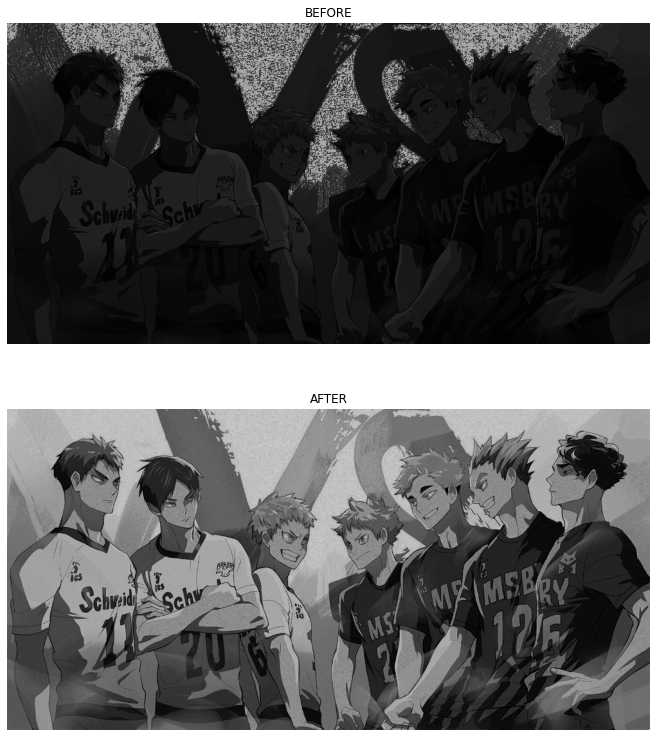

In [ ]:
# Show Brighten Result
plt.figure(figsize=(13,13))

plt.subplot(211)
plt.title('BEFORE')
imshowGreal(image_darken)

plt.subplot(212)
plt.title('AFTER')
imshowGreal(imgb)

plt.show()

Sebelum di-upload Image sudah diedit menggunakan aplikasi eksternal sehingga Brightness nya berkurang dari 0 menjadi -250. 
Setelah gambar di Gray-Scale, dilakukan inisiasi value pixel dan dibuat array baru. Untuk Value baru dengan i>0, maka nilai pixel ditambah dengan nilai index pixel sebelumnya, lalu semua nilai pixel akan dikali 200. 
Alhasil didapatkan nilai pixel yang baru, dan gambar menjadi lebih terang.

3) Bright Image Enhancement using Image Darken

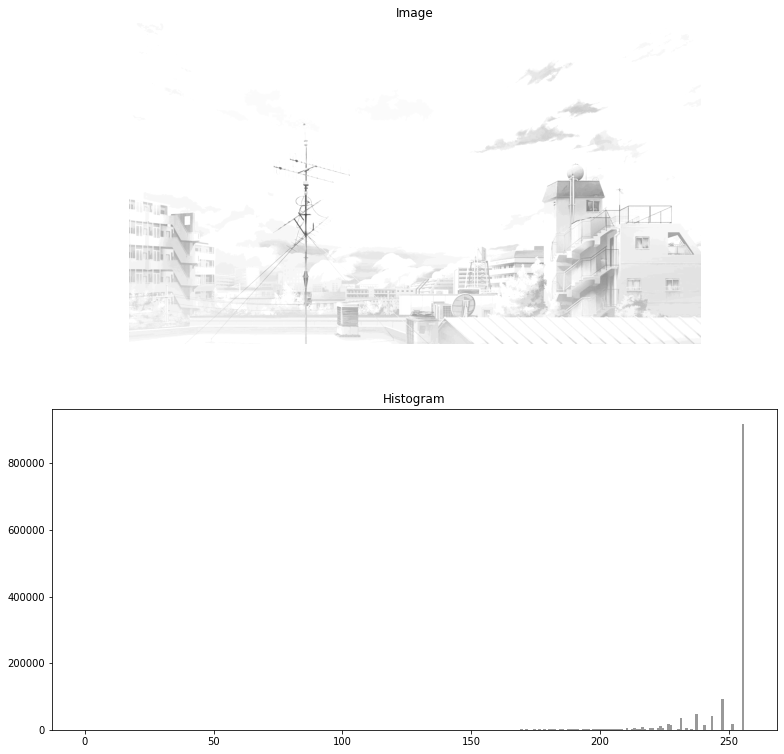

In [ ]:
# Import Image from Drive 
imgbr = cv.imread(('/content/drive/MyDrive/Pict/scenery2_bright.png'), cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(13,13))

plt.subplot(211)
plt.title('Image')
imshowGreal(imgbr)

plt.subplot(212)
plt.title('Histogram')

plt.hist(imgbr.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)

# Show Gray-Scaled Image
plt.show()

Darken Pixel Algorithm for Enhancement

In [ ]:
# Value of Pixel Initiated
rows = imgbr.shape[0]
cols = imgbr.shape[1]

# Initialize New Value of Array
newval=([])
for i in range(256):
    newval.append([])
    newval[-1].append(i)
    newval[-1].append(0)

# Get freq
for i in range (rows):
    for j in range (cols):
        n = imgbr[i][j]
        newval[n][1] = newval[n][1] + 1

# Get New Value
for i in range(256):
    newval[i][1] = newval[i][1]/(rows*cols)
    if(i>0):
        newval[i][1] = newval[i][1]+newval[i-1][1]

for i in range(256):
    newval[i][1] = round((newval[i][1]*180),2)

image_darkenr = imgbr.copy()
for i in range (rows):
    for j in range (cols):
        n = image_darkenr[i][j]
        image_darkenr[i][j] = newval[n][1]


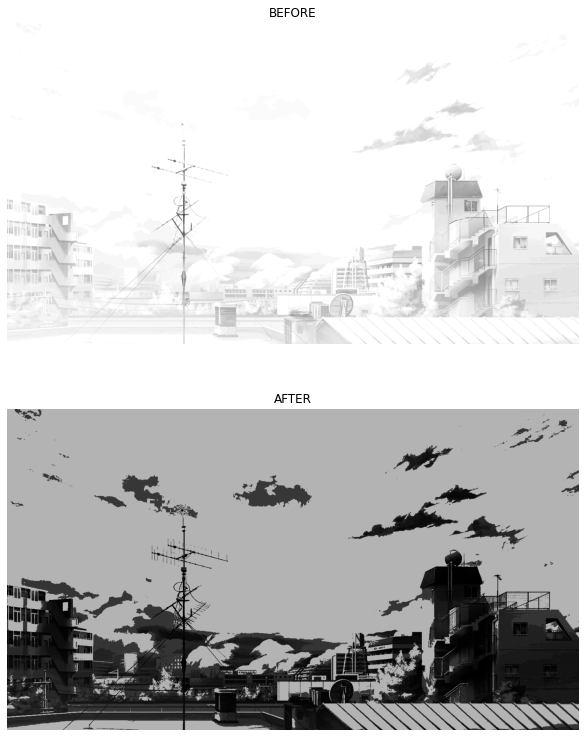

In [ ]:
# Show Output
plt.figure(figsize=(13,13))

plt.subplot(211)
plt.title('BEFORE')
imshowGreal(imgbr)

plt.subplot(212)
plt.title('AFTER')

imshowGreal(image_darkenr)

# Show Image after Enhancement
plt.show()

Gambar sebelumnya sudah di tingkatkan kecerahannya dengan aplikasi eksternal dari 0 menjadi 170.

Sehingga pada algoritma untuk meningkatkan darkness dari gambar dilakukan cara yang hampir sama dengan image brightness, namun dengan sedikit penyesuaian dan variabel yang berbeda

4) Blurred Image Enhancement using Smooting 

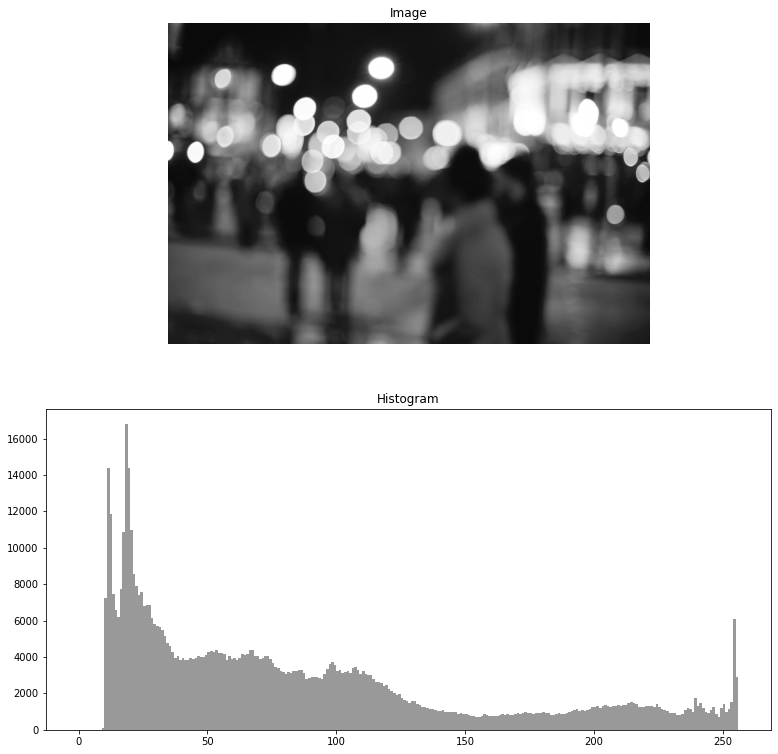

In [ ]:
# Import Image from Drive
image_blur = cv.imread(('/content/drive/MyDrive/Pict/crowded_blurred.jpg'), cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(13,13))

plt.subplot(211)
plt.title('Image')
imshowGreal(image_blur)

plt.subplot(212)
plt.title('Histogram')

plt.hist(image_blur.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)

# Show Gray-Scaled Image
plt.show()

In [ ]:
# Value of Pixel Initiated
rows = image_blur.shape[0]
cols = image_blur.shape[1]

# Initialize New Value of Array
newval=([])
for i in range(256):
    newval.append([])
    newval[-1].append(i)
    newval[-1].append(0)

# Get freq
for i in range (rows):
    for j in range (cols):
        n = image_blur[i][j]
        newval[n][1] = newval[n][1] + 1

# Get New Value
for i in range(256):
    newval[i][1] = newval[i][1]/(rows*cols)
    if(i>0):
        newval[i][1] = newval[i][1]+newval[i-1][1]

for i in range(256):
    newval[i][1] = round((newval[i][1]*200), 2)

image_sharp = image_blur.copy()
for i in range (rows):
    for j in range (cols):
        n = image_sharp[i][j]
        image_sharp[i][j] = newval[n][1]

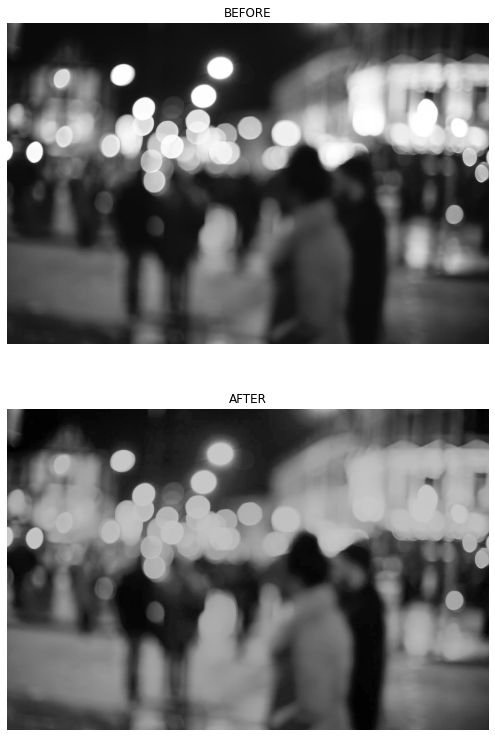

In [ ]:
# Show Brighten Result
plt.figure(figsize=(13,13))

plt.subplot(211)
plt.title('BEFORE')
imshowGreal(image_blur)

plt.subplot(212)
plt.title('AFTER')
imshowGreal(image_sharp)

plt.show()